# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.016031e+01     6.980904e+00
 * time: 0.004003047943115234
     1     2.458070e+01     5.487819e+00
 * time: 0.012085914611816406
     2     1.722324e+01     5.026599e+00
 * time: 0.03126788139343262
     3     1.500964e+01     5.037645e+00
 * time: 0.05035710334777832
     4     1.149193e+01     1.673859e+00
 * time: 0.06986188888549805
     5     1.006792e+01     1.005971e+00
 * time: 0.08894491195678711
     6     9.656829e+00     8.710230e-01
 * time: 0.10424304008483887
     7     9.252758e+00     8.437473e-01
 * time: 0.11973309516906738
     8     8.997665e+00     4.934913e-01
 * time: 0.13504695892333984
     9     8.880841e+00     7.961135e-01
 * time: 0.1465139389038086
    10     8.827322e+00     6.136859e-01
 * time: 0.15829896926879883
    11     8.777849e+00     8.747598e-01
 * time: 0.17039990425109863
    12     8.746642e+00     9.591865e-01
 * time: 0.18228602409362793
    13     8.695794e+00     4.581238e-01
 * time

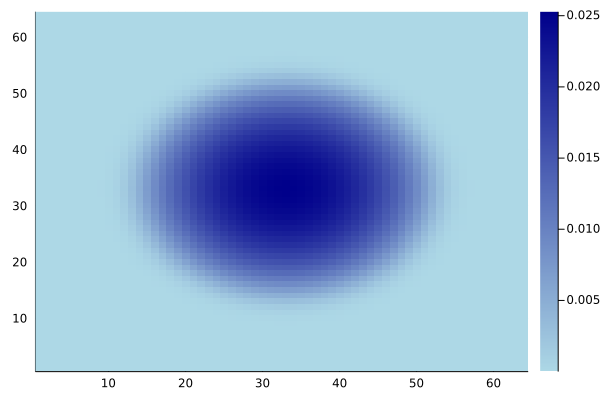

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)